In [1]:
import numpy as np
import matplotlib.pyplot as plt
from dataloader import CamusDataset

dataset = CamusDataset(file_path='camus_training.hdf5')

Display the underlying lookup table.

In [2]:
dataset.df.head(15)

,patient,id,view,ED/ES,frame_no
0,patient0001,1,2CH,ED,1.0
1,patient0001,1,2CH,ES,18.0
2,patient0001,1,4CH,ED,1.0
3,patient0001,1,4CH,ES,20.0
4,patient0002,2,2CH,ED,1.0
5,patient0002,2,2CH,ES,17.0
6,patient0002,2,4CH,ED,1.0
7,patient0002,2,4CH,ES,15.0
8,patient0003,3,2CH,ED,1.0
9,patient0003,3,2CH,ES,17.0


Let's retrieve a few random samples. The dataloader returns
1. The image
2. The mask
3. A tuple, containing:
    - The patient ID
    - The view
    - The frame (whether it's ED or ES)

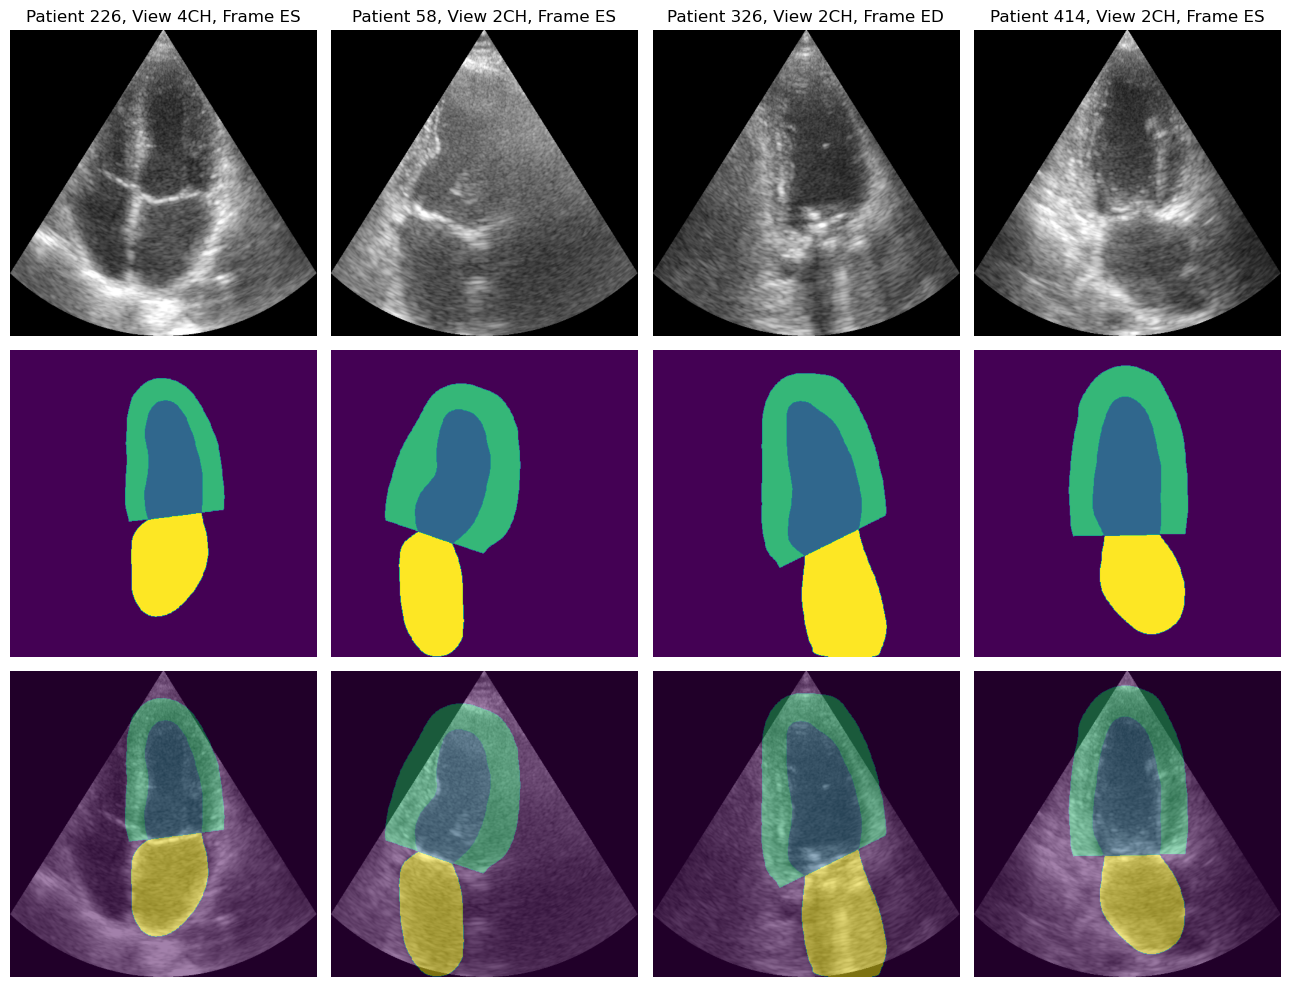

In [3]:
# Generate 4 random indices between 0 and len(dataset). Use them to retrieve 4 random images from the dataset. 

indices = np.random.randint(0, len(dataset), 4)

fig, axes = plt.subplots(3, 4, figsize=(13, 10))
for i in range(4):
    # Plot image
    axes[0,i].imshow(dataset[indices[i]][0].squeeze(), cmap='gray', vmin=0, vmax=1)
    axes[0,i].set_title(f"Patient {dataset[indices[i]][2][0]}, View {dataset[indices[i]][2][1]}, Frame {dataset[indices[i]][2][2]}")
    # Plot mask
    axes[1,i].imshow(dataset[indices[i]][1].squeeze())
    # Plot image AND mask
    axes[2,i].imshow(dataset[indices[i]][0].squeeze(), cmap='gray', vmin=0, vmax=1)
    axes[2,i].imshow(dataset[indices[i]][1].squeeze(), alpha=0.5)

for ax in axes.flatten():
    ax.axis('off')

plt.tight_layout()
plt.show()

### Test train/val split function
The following function splits the datasets into training and validation while applying different transforms to the two sets.

In [22]:
import albumentations as A
from utils import load_train_val_with_transforms

train_transform = A.Compose(
    [
    A.ShiftScaleRotate(shift_limit=0.2, scale_limit=0.2, rotate_limit=30, p=0.2),
    A.RandomBrightnessContrast(brightness_limit=0.3, contrast_limit=0.3, p=0.5),
    ]
)
        
transformations = {
    'train': train_transform,
    'val': None,
}

train_set, val_set = load_train_val_with_transforms(file_path='camus_training.hdf5', transforms=transformations, val_set_size=0.2)

Loaded 1800 samples from 450 patients
Created a training set of 1440 image pairs and a validation set of 360.


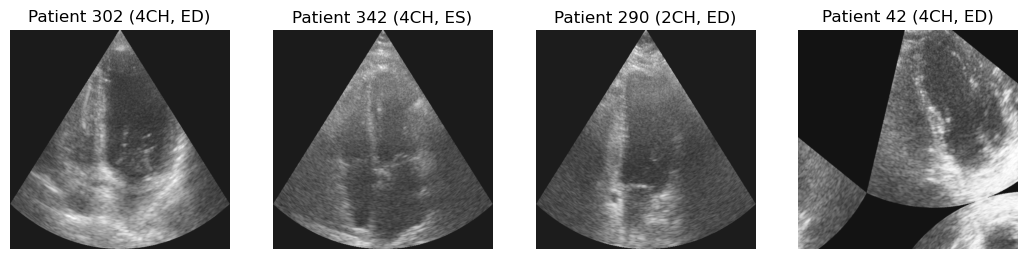

In [23]:
# Display 4 images from the training set
indices = np.random.randint(0, len(train_set), 4)
fig, axes = plt.subplots(1, 4, figsize=(13, 4))
for i in range(4):
    # Plot image
    axes[i].imshow(train_set[indices[i]][0].squeeze(), cmap='gray')
    axes[i].set_title(f"Patient {train_set[indices[i]][2][0]} ({train_set[indices[i]][2][1]}, {train_set[indices[i]][2][2]})")
    axes[i].axis('off')

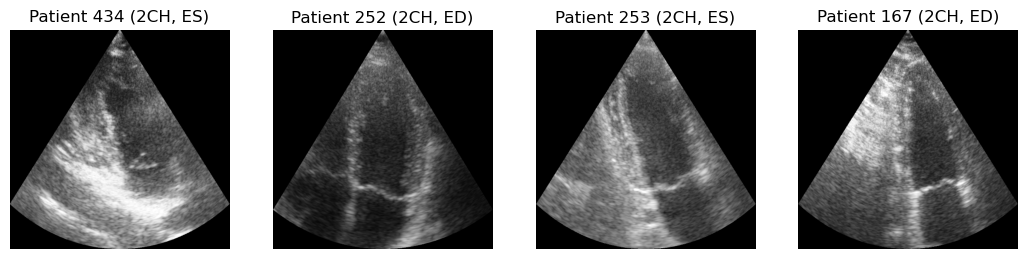

In [24]:
# Display 4 images from the validation set
indices = np.random.randint(0, len(val_set), 4)
fig, axes = plt.subplots(1, 4, figsize=(13, 4))
for i in range(4):
    # Plot image
    axes[i].imshow(val_set[indices[i]][0].squeeze(), cmap='gray', vmin=0, vmax=1)
    axes[i].set_title(f"Patient {train_set[indices[i]][2][0]} ({train_set[indices[i]][2][1]}, {train_set[indices[i]][2][2]})")
    axes[i].axis('off')